<a href="https://colab.research.google.com/github/a12345615/car-prediction-using-machine-learning/blob/main/car_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving car data.csv to car data (1).csv


Data collection and processing

In [ ]:
#loading the data from csv file
car=pd.read_csv('/content/car data.csv')

In [ ]:
car.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#checking the rows and columns
car.shape

(301, 9)

In [ ]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#checking the distribution of  categoriccal data type
print(car.Fuel_Type.value_counts())
print('-'*50)
print(car.Seller_Type.value_counts())
print('-'*50)
print(car.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
--------------------------------------------------
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
--------------------------------------------------
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
#encoding the categorical data
#fuel type column
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
#seller type
car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
#transmission
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

/tmp/ipython-input-4287343620.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
/tmp/ipython-input-4287343620.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
/tmp/ipython-input-4287343620.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in 

In [ ]:
car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [ ]:
#spliting the test data
x=car.drop(['Car_Name','Selling_Price'],axis=1)
y=car['Selling_Price']

In [ ]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (240, 7) (61, 7)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(301,) (240,) (61,)


In [ ]:
#linear regression model
linear_model=LinearRegression()

In [ ]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
#model evalution
#prediction on train data
training_data_prediction=linear_model.predict(x_train)

In [ ]:
#r squared error
error_score=metrics.r2_score(y_train,training_data_prediction)
print("r squared error:",error_score)

r squared error: 0.8838169193709796


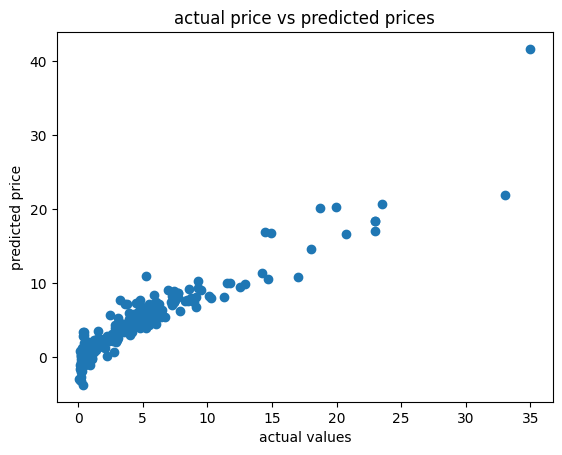

In [ ]:
#viualization actual and predict value
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual values")
plt.ylabel("predicted price")
plt.title("actual price vs predicted prices")
plt.show()

In [ ]:
test_data_prediction=linear_model.predict(x_test)


In [ ]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("r squared predictions:",error_score)

r squared predictions: 0.8401532365377697


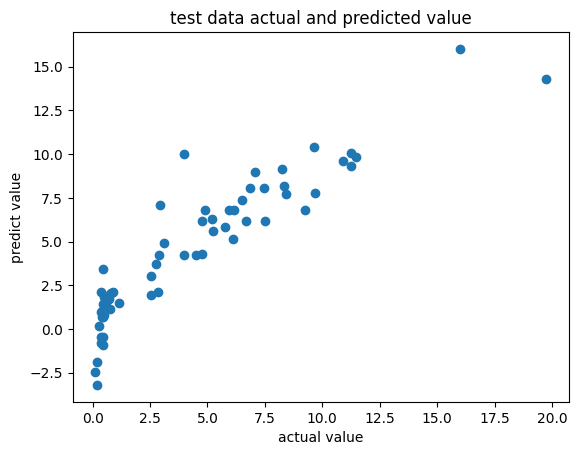

In [ ]:
plt.scatter(y_test,test_data_prediction)
plt.title("test data actual and predicted value")
plt.xlabel("actual value")
plt.ylabel("predict value")
plt.show()


In [ ]:
#lasso regression
lasso_model=Lasso()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(301, 7) (240, 7) (61, 7)


In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(301,) (240,) (61,)


In [ ]:
#linear regression model
lasso_model=Lasso()

In [ ]:
lasso_model.fit(x_train,y_train)

Lasso()

In [ ]:
#model evalution
#prediction on train data
training_data_prediction=lasso_model.predict(x_train)

In [ ]:
#r squared error
error_score=metrics.r2_score(y_train,training_data_prediction)
print("r squared error:",error_score)

r squared error: 0.843587395258283


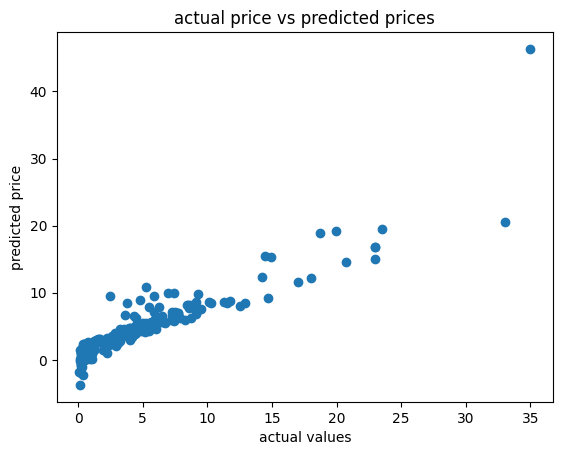

In [ ]:
#viualization actual and predict value
plt.scatter(y_train,training_data_prediction)
plt.xlabel("actual values")
plt.ylabel("predicted price")
plt.title("actual price vs predicted prices")
plt.show()

In [ ]:
test_data_prediction=lasso_model.predict(x_test)


In [ ]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("r squared predictions:",error_score)

r squared predictions: 0.8497457570738539


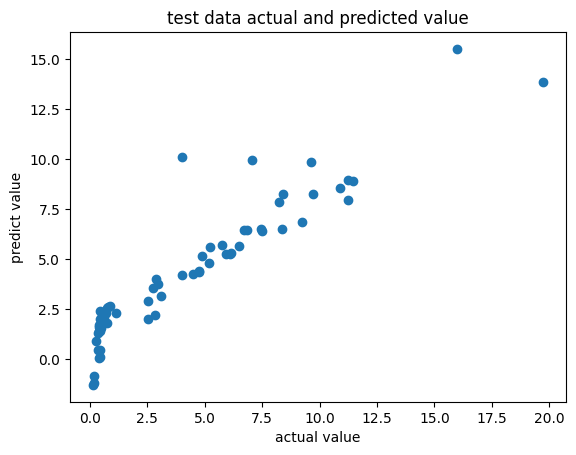

In [ ]:
plt.scatter(y_test,test_data_prediction)
plt.title("test data actual and predicted value")
plt.xlabel("actual value")
plt.ylabel("predict value")
plt.show()
